## Load Libraries

In [1]:
library("rcompanion")
library("car")
library("effects")
library("multcomp")

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




## Load in Data

In [20]:
data1 <- read.csv("/Users/kenyashiafernandez/Downloads/graduate_admissions.csv")

In [21]:
head(data1)

Serial.No. GRE.Score TOEFL.Score University.Rating SOP LOR CGPA Research
1 1          337       118         4                 4.5 4.5 9.65 1       
2 2          324       107         4                 4.0 4.5 8.87 1       
3 3          316       104         3                 3.0 3.5 8.00 1       
4 4          322       110         3                 3.5 2.5 8.67 1       
5 5          314       103         2                 2.0 3.0 8.21 0       
6 6          330       115         5                 4.5 3.0 9.34 1       
  Chance.of.Admit
1 0.92           
2 0.76           
3 0.72           
4 0.80           
5 0.65           
6 0.90

## "Does University Rating significantly predict your college GPA when holding TOEFL score constant?"

## Data Wrangling

### Ensure the IV is a factor

In [22]:
str(data1$University.Rating)

 int [1:400] 4 4 3 3 2 5 3 2 1 3 ...


In [23]:
data1$University.Rating <- as.factor(data1$University.Rating)

### Ensure CV is a factor

In [24]:
str(data1$Research)
data1$Research <- as.factor(data1$Research)

 int [1:400] 1 1 1 1 0 1 1 0 0 0 ...


## Testing Assumptions

### Normality

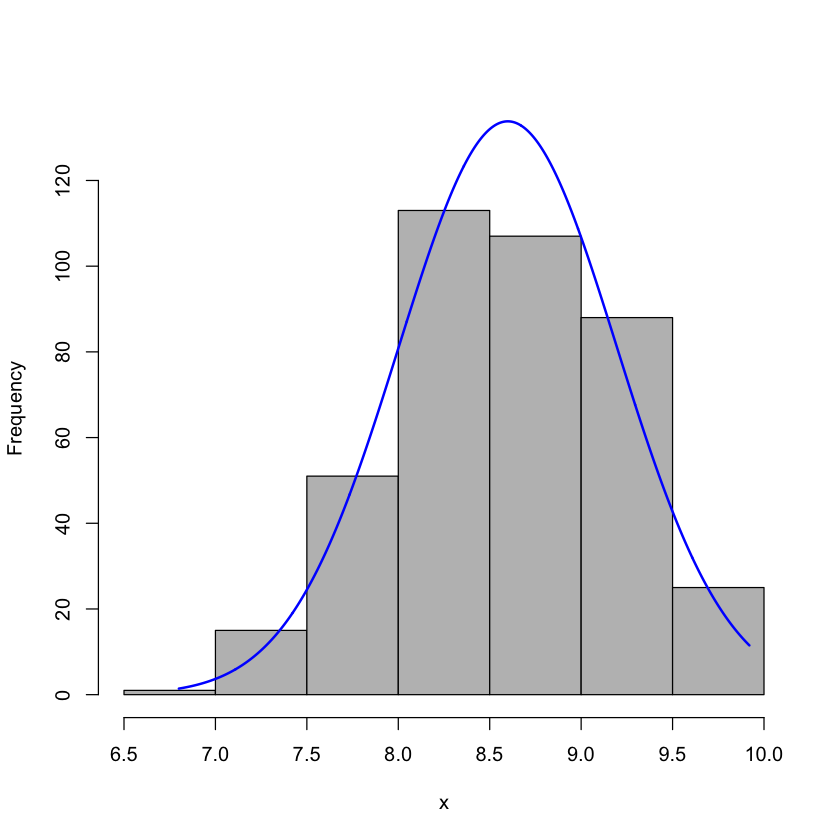

In [25]:
plotNormalHistogram(data1$CGPA)

## SQRT

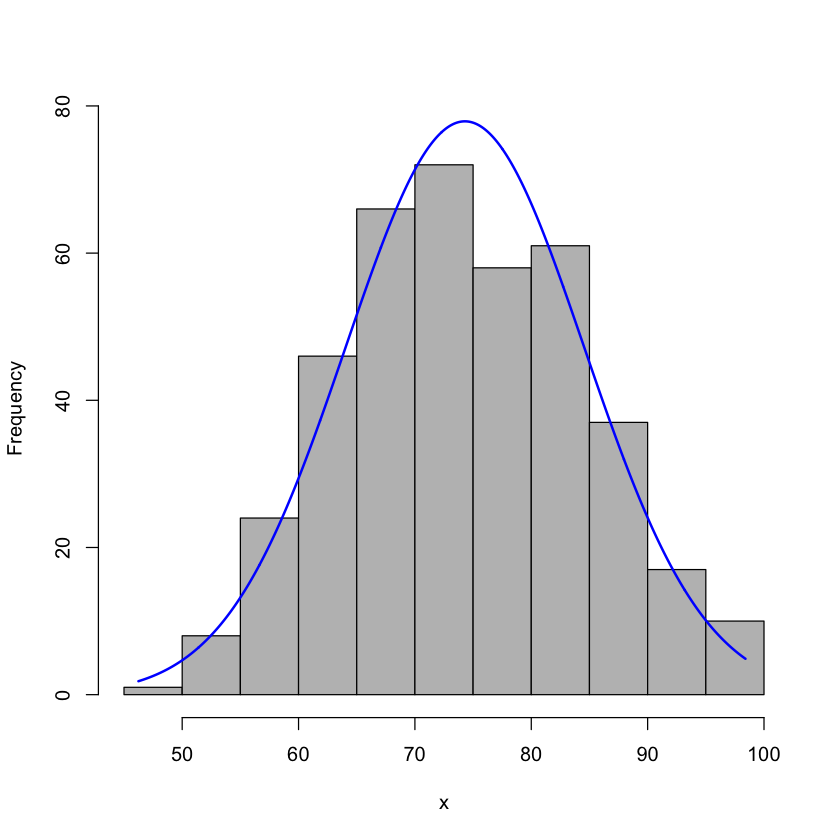

In [26]:
data1$CGPAsq <- data1$CGPA * data1$CGPA
plotNormalHistogram(data1$CGPAsq)

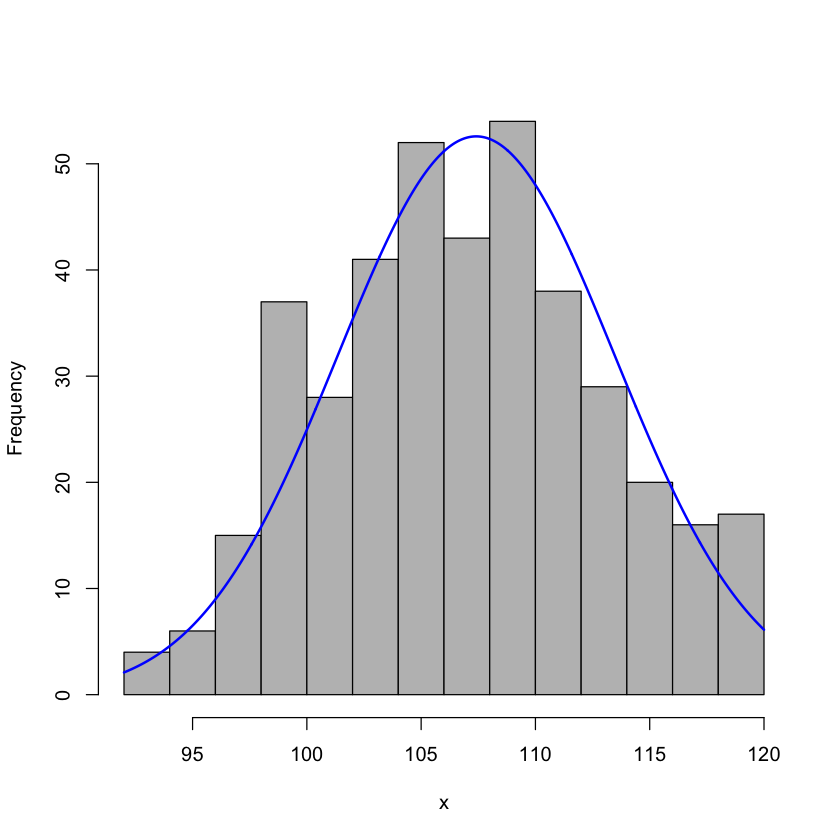

In [27]:
plotNormalHistogram(data1$TOEFL.Score)

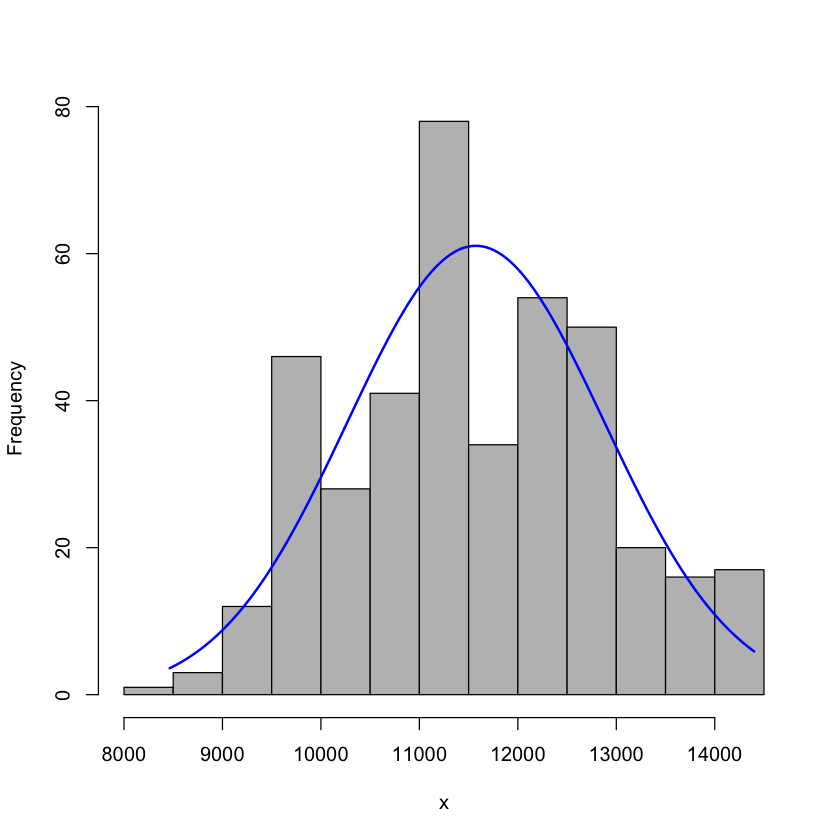

In [28]:
data1$TOEFL.ScoreSQ <- data1$TOEFL.Score * data1$TOEFL.Score
plotNormalHistogram(data1$TOEFL.ScoreSQ)

## Homogeneity of Varience

In [29]:
leveneTest(CGPAsq~University.Rating, data=data1)

Df  F value   Pr(>F)   
group   4 0.7200971 0.5785833
      395        NA        NA

## Homogeneity of Regression Slopes

In [30]:
Homogeneity_RegrSlp = lm(CGPA~TOEFL.Score, data=data1)
anova(Homogeneity_RegrSlp)

Df  Sum Sq   Mean Sq    F value  Pr(>F)      
TOEFL.Score   1 97.37016 97.3701552 870.6287 3.13431e-102
Residuals   398 44.51188  0.1118389       NA           NA

## Analysis

In [31]:
ANCOVA = lm(CGPA~TOEFL.Score + University.Rating*TOEFL.Score, data=data1)
anova(ANCOVA)

Df  Sum Sq     Mean Sq     F value    
TOEFL.Score                     1 97.3701552 97.37015522 1045.554338
University.Rating               4  7.9712067  1.99280167   21.398574
TOEFL.Score:University.Rating   4  0.2208414  0.05521034    0.592845
Residuals                     390 36.3198345  0.09312778          NA
                              Pr(>F)       
TOEFL.Score                   2.057420e-112
University.Rating              5.674127e-16
TOEFL.Score:University.Rating  6.680100e-01
Residuals                                NA

## Post Hocs

In [32]:
postHocs <- glht(ANCOVA,linfct=mcp(University.Rating = "Tukey"))
summary(postHocs)

Warning message in mcp2matrix(model, linfct = linfct):
“covariate interactions found -- default contrast might be inappropriate”



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = CGPA ~ TOEFL.Score + University.Rating * TOEFL.Score, 
    data = data1)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)
2 - 1 == 0 -0.13221    1.71021  -0.077    1.000
3 - 1 == 0  0.89864    1.70432   0.527    0.984
4 - 1 == 0 -0.40634    1.80906  -0.225    0.999
5 - 1 == 0 -0.17220    1.89386  -0.091    1.000
3 - 2 == 0  1.03085    0.95156   1.083    0.807
4 - 2 == 0 -0.27414    1.12848  -0.243    0.999
5 - 2 == 0 -0.03999    1.25994  -0.032    1.000
4 - 3 == 0 -1.30499    1.11954  -1.166    0.762
5 - 3 == 0 -1.07084    1.25193  -0.855    0.908
5 - 4 == 0  0.23414    1.39117   0.168    1.000
(Adjusted p values reported -- single-step method)


## Adjusted Means

In [33]:
adjMeans <- effect("University.Rating", ANCOVA)
adjMeans

NOTE: University.Rating is not a high-order term in the model




 University.Rating effect
University.Rating
       1        2        3        4        5 
8.218138 8.416000 8.579274 8.733511 8.887481 